# Graphing Repo For Distribution

<h2> Function to plot the normal distbution graph <h2>

In [2]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib
import matplotlib.pyplot as plt
import scienceplots as sp

matplotlib.use("pgf")


import pandas as pd
import csv
from collections import defaultdict

ModuleNotFoundError: No module named 'scienceplots'

In [2]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

<h3> The files Processing </h3>

In [6]:
def process_csv(file,location=None):
    counter=defaultdict(int)
    df = pd.read_csv(file)
    if(location==None):
        raw=[i for i in df['Matching'].tolist()]
        for i in df['Matching'].tolist():
            counter[str(i)]+=1
    else:
        matching_scores=df['Matching'].tolist()
        raw=[matching_scores[i] for i in location]
        for i in location:
            counter[str(matching_scores[i])]+=1
    return [int(i) for i in counter.keys()],counter.values(),raw

<h3> the function for graphing </h3>

In [4]:
class Distribution:
    @staticmethod
    #lower bound and upper bound are the actual matching score, not percentage
    def plot(x_axis:list, y_axis:list, raw,
            title=None, x_label=None, y_label=None, legend_label=None, legend_location="best"):
        # title        = title        or "Matching Score Distribution"
        x_label      = x_label      or "Matching Scores"
        y_label      = y_label      or "Frequency/Occurance"
        legend_label = legend_label or "Benchmark Mean ={} Std = {}".format(int(np.mean(np.array(raw))),int(np.std(np.array(raw))))
        plt.title(title)
        plt.bar(x_axis, y_axis, 1/1.5, alpha=0.75,label=legend_label,log=True)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(loc=legend_location)
        return plt

In [5]:
clustered_attack_indices=sorted([i+(j*256) for i in range(129,256) for j in range(0,4)])
clustered_normal_indices=sorted([i+(j*256) for i in range(129) for j in range(0,4)])

nonclustered_attack_indices=sorted([25,281,537,793])
nonclustered_normal_indices=sorted([i for i in range(1024) if i not in nonclustered_attack_indices])

<h3> Attack vs Non Attack Matching Score Graph </h3>

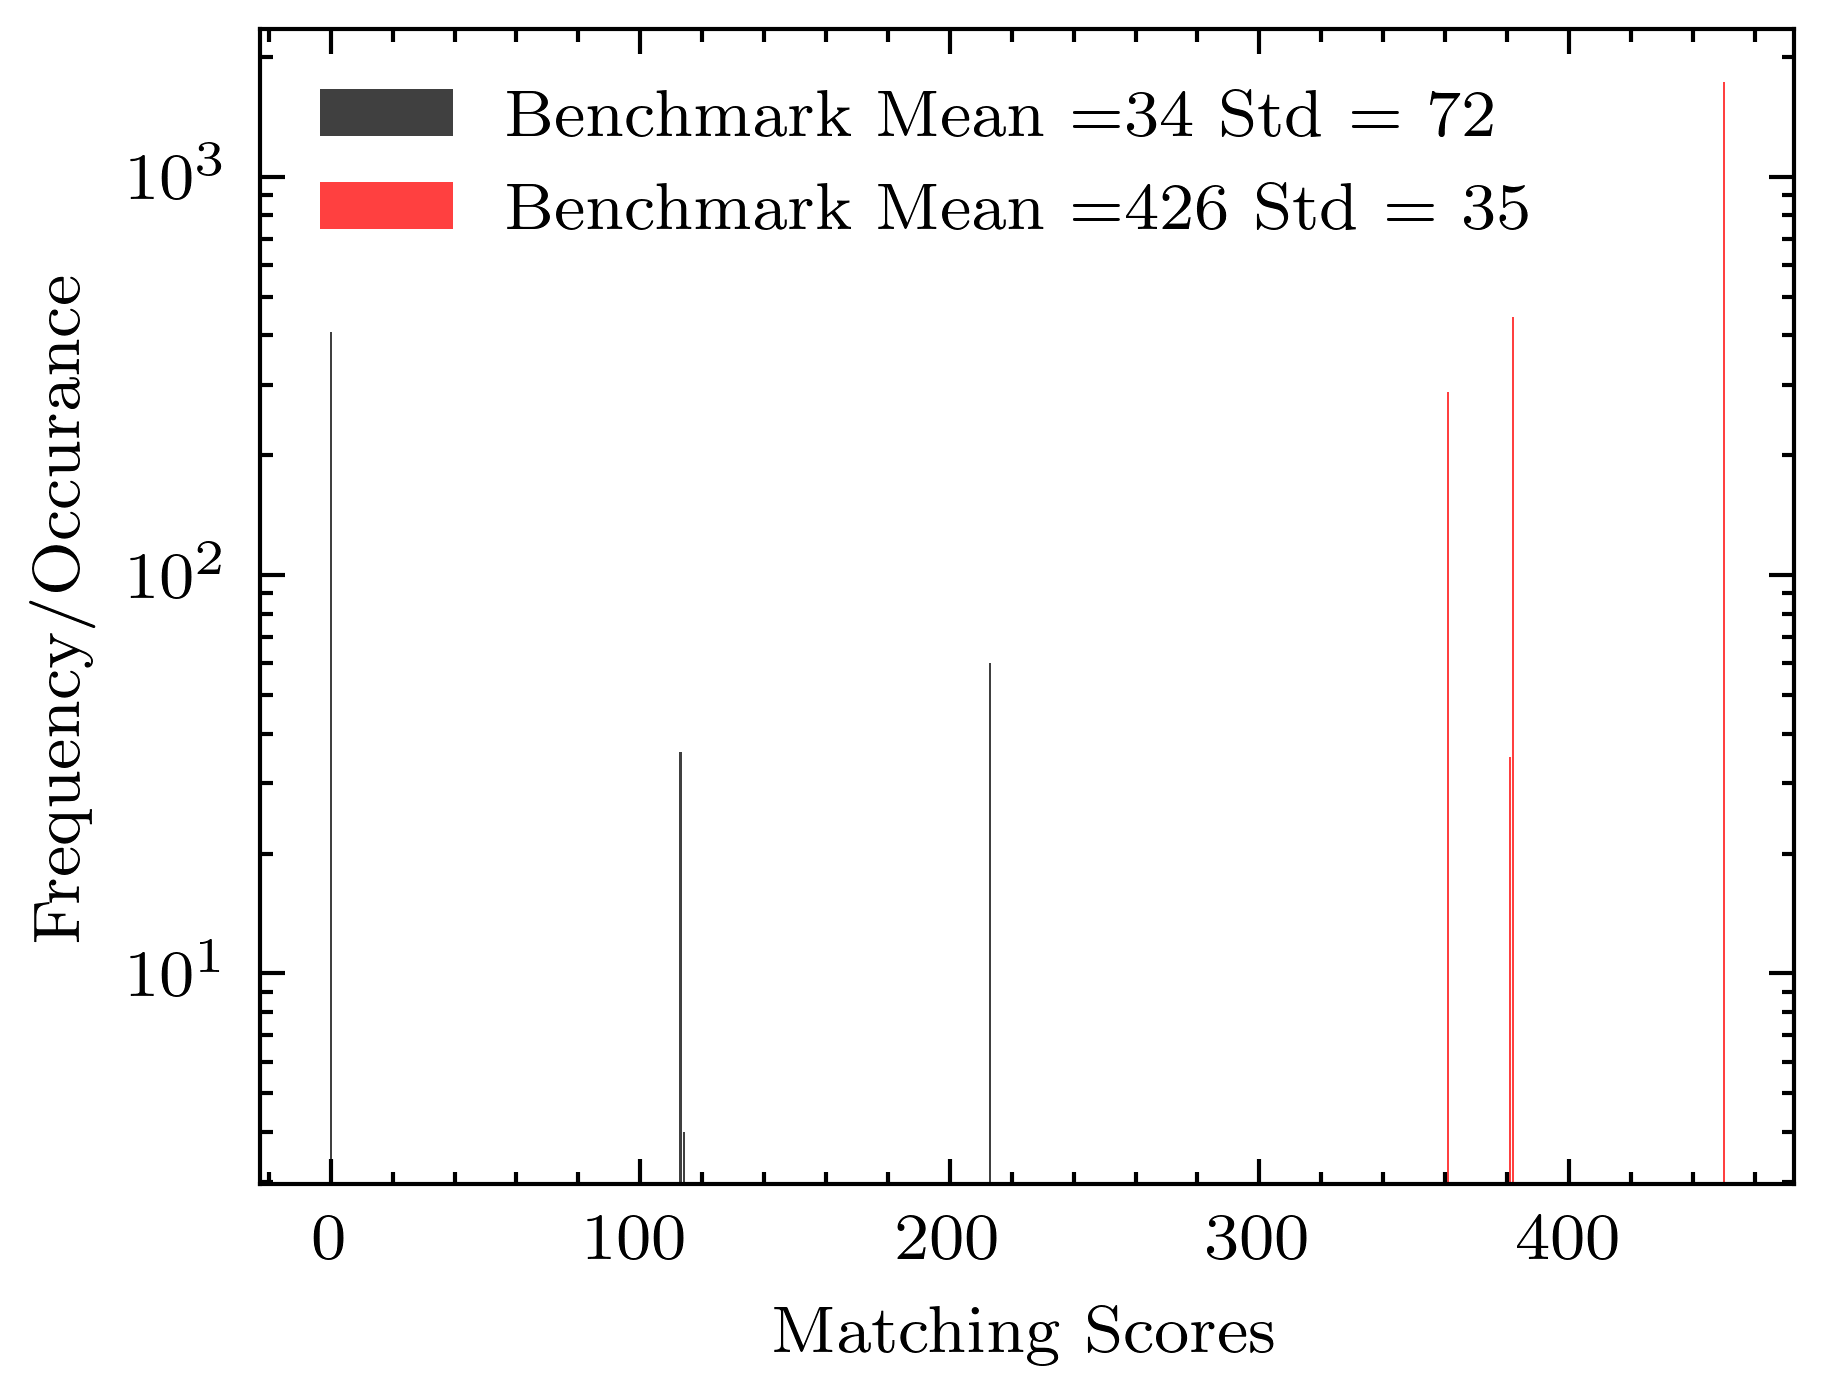

In [6]:
with plt.style.context(['science', 'ieee']):
    x,y,r1=process_csv("Kruskal/Cluster/Kruskal_Cluster_450.csv",clustered_attack_indices) # change names accordingly
    k,j,r2=process_csv("Kruskal/Kruskal_Distribution.csv")
    plot=Distribution.plot(x,y,r1)
    plot=Distribution.plot(k,j,r2)
    plot.show()
    # plt.savefig('distribution_graph.pgf', bbox_inches='tight')


<h3> Additional Mathematical Functions for Processing Data </h3>

In [7]:
# CALCULATING THE percision, recall, and accuracy, helper function, do not modify
def metrics(TP,FP,FN,TN,total):
    percision=TP/(TP+FP)
    recall=TP/(TP+FN)
    false_pos=FP/total
    accuracy=(TP+TN)/total

    return percision,recall,accuracy,false_pos

def decision_process(decision:list[bool],normal_loc:list[int],attack_loc:list[int]):

    # decision are raw data after decision processing
    # normal locations are iterations not attacked, in forms of index vector
    # attack_loc are iterations are attacked, in forms of index vector
    total=len(decision)
    TP,FP,FN,TN=0,0,0,0

    for i in attack_loc:
        if not decision[i]:
            TP+=1
        else:
            FN+=1
    
    for i in normal_loc:
        if decision[i]:
            TN+=1
        else:
            FP+=1
    
    return metrics(TP,FP,FN,TN,total)

In [8]:
#This function calculates the threathold value for the program

def threathold(datafile:csv, length:int, legal_location=None,std=0):
    _,_,raw=process_csv(datafile,legal_location)
    return int(np.mean(np.array(raw)))-std*int(np.std(np.array(raw)))

# The function aims to redo all the decisions based on the std deviation for normal approach

def decisions (datafile: csv, threath: int) -> list[bool]:
    df = pd.read_csv(datafile)
    return [(i>threath) for i in df['Matching'].tolist()]


In [9]:
benchmarks=["Bellman", "bi_search", "DFS", "FW", "Huffman", "Kruskal", "LCS", "MergeSort", "Prim", "Rabinkarp"]

samples_legend_colors={
    "Bellman":"red", 
    "bi_search": "orangered",
    "DFS": "blue",
    "FW": "green", 
    "Huffman":"black", 
    "Kruskal":"orange", 
    "LCS":"purple", 
    "MergeSort": "aqua",
    "Prim":"peru", 
    "Rabinkarp":"pink"
}

samples_cluster={
    "Bellman":[200,250,350,450,500], 
    "bi_search": [200,250,300,350,400],
    "DFS": [i for i in range(100,351,50)],
    "FW":[i for i in range(200,351,50)], 
    "Huffman":[300,400,500,700,800,850], 
    "Kruskal":[100,250,350,400,450], 
    "LCS":[300,350,400,450,520], 
    "MergeSort": [500,600,700,800],
    "Prim":[200,250,300,350,400], 
    "Rabinkarp":[100,150,250,400,500]
}

samples_noncluster={
    "Bellman":[250,350,450,500], 
    "bi_search": [250,300,350,400],
    "DFS": [i for i in range(200,351,50)],
    "FW":[i for i in range(250,351,50)], 
    "Huffman":[300,400,500,700,800,900], 
    "Kruskal":[100,250,350,400,450,500], 
    "LCS":[350,400,450,520], 
    "MergeSort": [500,700,800],
    "Prim":[250,300,350,400], 
    "Rabinkarp":[100,250,400,500,600]
}

# Non Clustered

<h3> Graphing Accuracy Plots </h3>

In [10]:
result_noncluster=[]
for i in benchmarks:
    th=threathold(f"{i}/Non-cluster/{i}_noncluster_{samples_noncluster[i][-3]}.csv",clustered_normal_indices)
    decision=decisions(f"{i}/Non-cluster/{i}_noncluster_{samples_noncluster[i][-3]}.csv",th)
    result_noncluster.append(decision_process(decision,nonclustered_normal_indices,nonclustered_attack_indices)) # for each, the first is percision, recall, then accuracy,false pos
    
result2=zip(benchmarks,result_noncluster)
for i in result2:
    print(i[0],i[1])
    print()

Bellman (0.02857142857142857, 1.0, 0.8671875, 0.1328125)

bi_search (0.4, 1.0, 0.994140625, 0.005859375)

DFS (0.032, 1.0, 0.8818359375, 0.1181640625)

FW (0.0, 0.0, 0.994140625, 0.001953125)

Huffman (0.02857142857142857, 1.0, 0.8671875, 0.1328125)

Kruskal (0.0106951871657754, 1.0, 0.638671875, 0.361328125)

LCS (0.005952380952380952, 1.0, 0.34765625, 0.65234375)

MergeSort (0.0, 0.0, 0.890625, 0.10546875)

Prim (0.038461538461538464, 1.0, 0.90234375, 0.09765625)

Rabinkarp (0.8, 1.0, 0.9990234375, 0.0009765625)



# Clustered

<h3> Graphing Accuracy Plots </h3>

In [11]:
result_cluster=[]
#print(benchmarks[4])
for i in benchmarks:
    th=threathold(f"{i}/Cluster/{i}_Cluster_{samples_cluster[i][-1]}.csv",clustered_normal_indices)
    decision=decisions(f"{i}/Cluster/{i}_Cluster_{samples_cluster[i][-1]}.csv",th)
    result_cluster.append(decision_process(decision,clustered_normal_indices,clustered_attack_indices)) # for each, the first is percision, recall, and then accuracy

result2=zip(benchmarks,result_cluster)
for i in result2:
    print(i[0],i[1])
    print()

Bellman (0.9902534113060428, 1.0, 0.9951171875, 0.0048828125)

bi_search (0.9920212765957447, 0.734251968503937, 0.865234375, 0.0029296875)

DFS (0.9977924944812362, 0.889763779527559, 0.9443359375, 0.0009765625)

FW (0.996039603960396, 0.9901574803149606, 0.9931640625, 0.001953125)

Huffman (0.5503685503685504, 0.4409448818897638, 0.5439453125, 0.1787109375)

Kruskal (1.0, 1.0, 1.0, 0.0)

LCS (0.9980353634577603, 1.0, 0.9990234375, 0.0009765625)

MergeSort (0.9941291585127201, 1.0, 0.9970703125, 0.0029296875)

Prim (0.9530075187969925, 0.9980314960629921, 0.974609375, 0.0244140625)

Rabinkarp (0.9980353634577603, 1.0, 0.9990234375, 0.0009765625)



<h2> Plotting the General Distribution </h2>

In [1]:
with plt.style.context(['science', 'ieee']):
    # Plotting the first graph
    accu_cluster=[i[2] for i in result_cluster] # recall
    accu_noncluster=[i[2] for i in result_noncluster] # accuracy

    X_axis = np.arange(len(benchmarks))
    plt.bar(X_axis - 0.2, accu_cluster, 0.4, label='Clustered')
    plt.bar(X_axis + 0.2, accu_noncluster, 0.4, label='Non-Clustered')

    # Rotating x-axis tick labels diagonally
    plt.xticks(X_axis, benchmarks, rotation=45, ha="right")
    
    # Remove vertical xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False)

    plt.xlabel("Benchmarks")
    plt.ylabel("Accuracy")

    # Adding legend above the graph
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    plt.show()

    # Plotting the second graph
    accu_cluster=[i[3] for i in result_cluster] # recall
    accu_noncluster=[i[3] for i in result_noncluster] # accuracy

    X_axis = np.arange(len(benchmarks))
    plt.bar(X_axis - 0.2, accu_cluster, 0.4, label='Clustered')
    plt.bar(X_axis + 0.2, accu_noncluster, 0.4, label='Non-Clustered')

    # Rotating x-axis tick labels diagonally
    plt.xticks(X_axis, benchmarks, rotation=45, ha="right")
    
    # Remove vertical xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False)

    plt.xlabel("Benchmarks")
    plt.ylabel("False Positives")

    # Adding legend above the graph
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    plt.show()

NameError: name 'plt' is not defined

<h2> Plotting the Sample Variation Distribution </h2>
 - first one is clustered <br>
 - second one is non-clustered

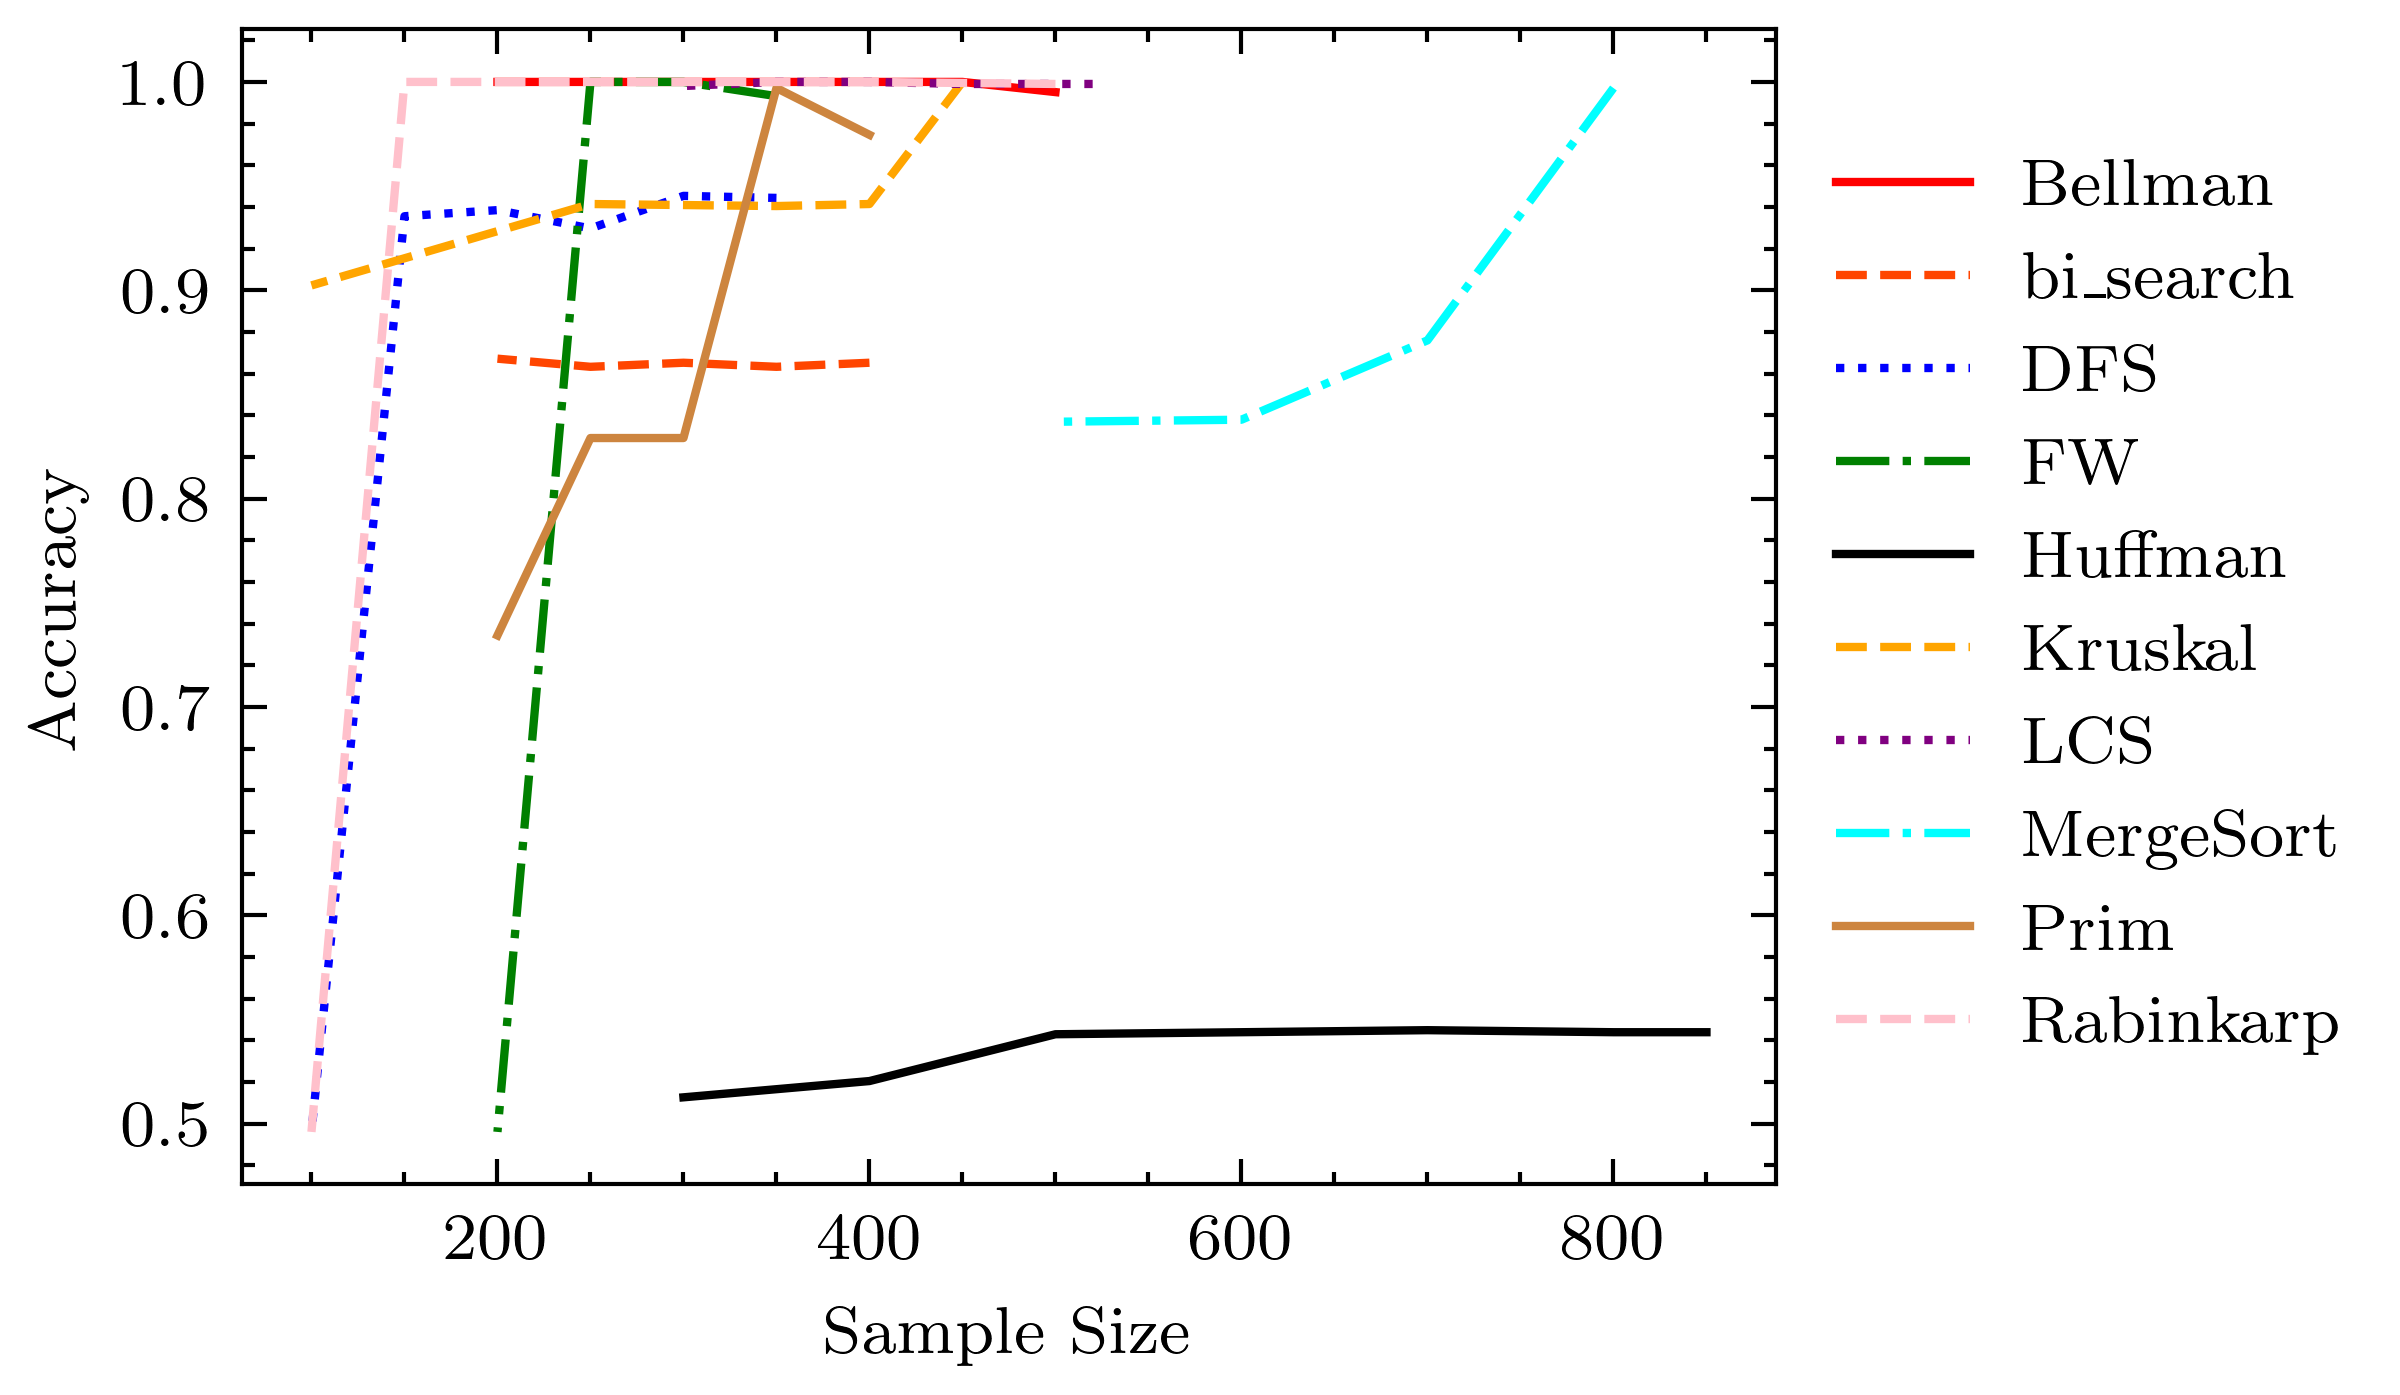

In [21]:
with plt.style.context(['science', 'ieee']):
    # plt.figure(figsize=(14,6))
    for i in benchmarks:
        sample_size=[]
        results=[]
        for j in range(len(samples_cluster[i])):
            th=threathold(f"{i}/Cluster/{i}_Cluster_{samples_cluster[i][-(j+1)]}.csv",clustered_normal_indices)
            decision=decisions(f"{i}/Cluster/{i}_Cluster_{samples_cluster[i][-(j+1)]}.csv",th)
            sample_size.append(samples_cluster[i][-(j+1)])
            results.append(decision_process(decision,clustered_normal_indices,clustered_attack_indices)[2]) #0 is percision, 1 recall, 2 accuracy, 3 false positive
        
        plt.plot(sample_size, results, color=samples_legend_colors[i], label=i)

    # Creating the line plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend vertically to the right
    plt.xlabel("Sample Size")
    plt.ylabel("Accuracy")
    plt.show()
    # plt.savefig('sample_variation.pgf', bbox_inches='tight')


# plt.figure(figsize=(14,6))
# for i in benchmarks:
#     sample_size=[]
#     results=[]
#     for j in range(len(samples_noncluster[i])):
#         th=threathold(f"{i}/Non-cluster/{i}_noncluster_{samples_noncluster[i][-(j+1)]}.csv",nonclustered_normal_indices)
#         decision=decisions(f"{i}/Non-cluster/{i}_noncluster_{samples_noncluster[i][-(j+1)]}.csv",th)
#         sample_size.append(samples_noncluster[i][-(j+1)])
#         results.append(decision_process(decision,nonclustered_normal_indices,nonclustered_attack_indices)[2]) #0 is percision, 1 recall, 2 accuracy, 3 false positive
    
#     plt.plot(sample_size,results, color=samples_legend_colors[i], label=i)

# plt.legend()
# plt.show()
    
        

# Time Variation Distribution

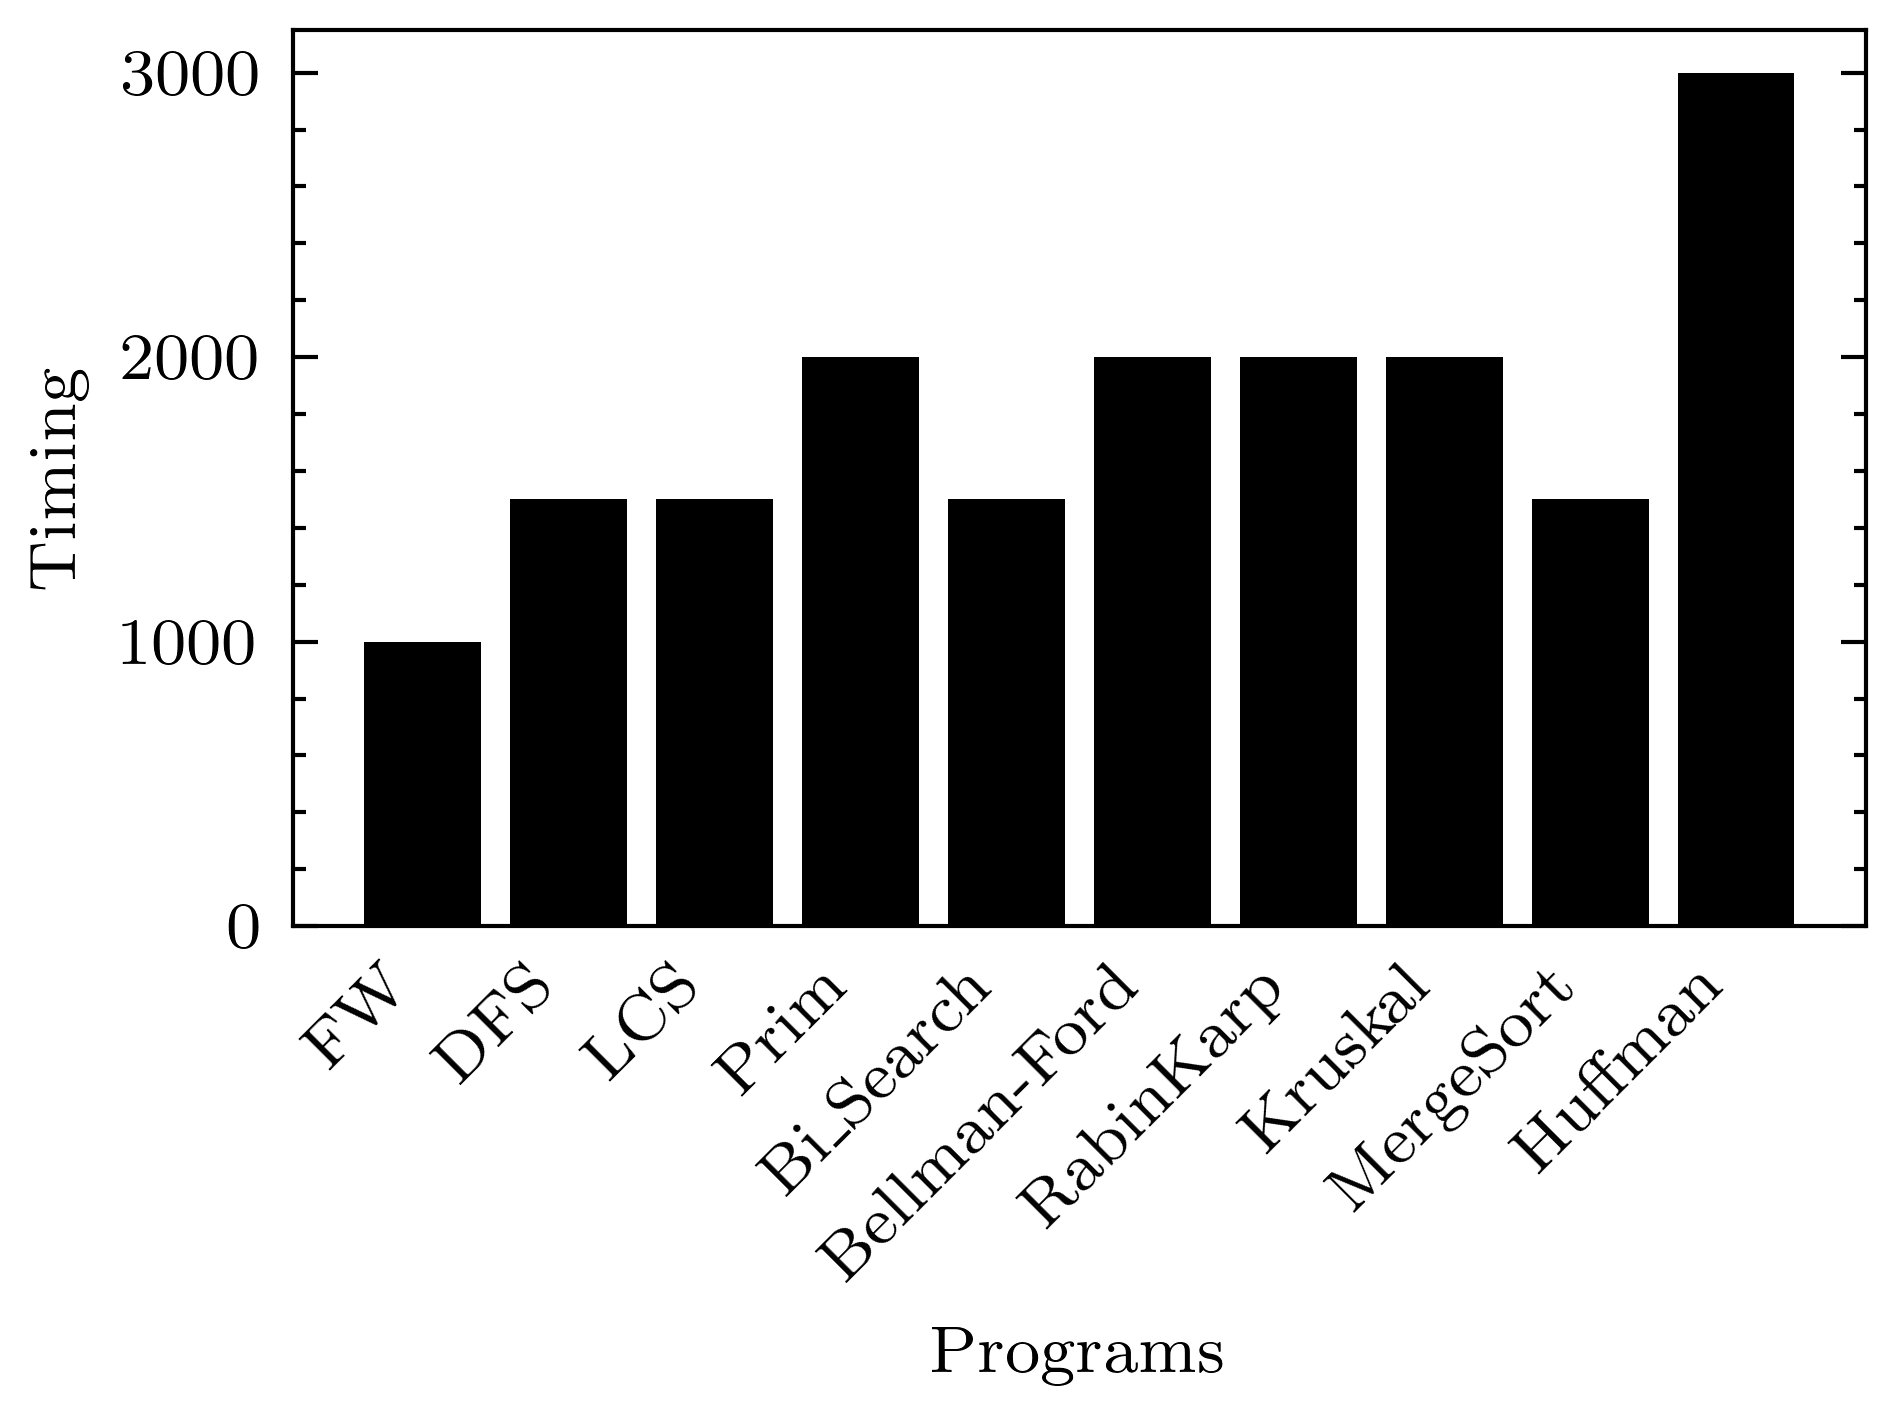

In [25]:
with plt.style.context(['science', 'ieee']):
    programs = ["FW","DFS","LCS","Prim","Bi_Search","Bellman-Ford","RabinKarp","Kruskal","MergeSort","Huffman"]
    timing = [1000, 1500, 1500, 2000, 1500, 2000, 2000, 2000, 1500, 3000]

    # Create the bar plot
    plt.bar(programs, timing, align='center')

    # Rotate x-axis tick labels diagonally
    plt.xticks(rotation=45, ha="right")

    # Remove vertical xticks
    plt.tick_params(axis='x', which='both', bottom=False, top=False)

    plt.xlabel("Programs")
    plt.ylabel("Timing")
    plt.tight_layout()  # Adjust layout to prevent labels from being cut off
    plt.show()

# Power Difference for ROP/Non-ROP Demo

<br> Idea is to plot the ROP and Non Rop on same graph with a legend

In [15]:
rop=np.array([-0.13085938, -0.12011719,  0.00585938, -0.33105469, -0.16796875,
       -0.12695312,  0.01953125, -0.19433594, -0.05664062, -0.06152344,
        0.05371094, -0.10449219,  0.015625  , -0.0078125 ,  0.09863281,
       -0.22070312, -0.0859375 , -0.09082031,  0.03515625, -0.29882812,
       -0.15136719, -0.12402344,  0.01269531, -0.19628906, -0.05664062,
       -0.04785156,  0.07226562, -0.25      , -0.10058594, -0.0859375 ,
        0.04199219, -0.25488281, -0.12109375, -0.09667969,  0.03515625,
       -0.17089844, -0.03027344, -0.0234375 ,  0.09375   , -0.25683594,
       -0.10839844, -0.08398438,  0.04980469, -0.07128906,  0.05957031,
        0.0390625 ,  0.13671875, -0.13378906, -0.00390625, -0.01660156,
        0.09277344, -0.09863281,  0.03222656,  0.01269531,  0.12304688,
       -0.09082031,  0.03710938,  0.02246094,  0.12988281, -0.06054688,
        0.06054688,  0.03417969,  0.13769531, -0.015625  ,  0.09765625,
        0.06445312,  0.15625   ,  0.00878906,  0.11816406,  0.08691406,
        0.18066406,  0.00292969,  0.10546875,  0.06640625,  0.15527344,
       -0.03125   ,  0.08007812,  0.04785156,  0.140625  , -0.04980469,
        0.0625    ,  0.03125   ,  0.12597656, -0.21679688, -0.08496094,
       -0.07617188,  0.04394531, -0.30859375, -0.16503906, -0.14648438,
       -0.00976562, -0.296875  , -0.14941406, -0.12402344,  0.01171875,
       -0.16113281, -0.0234375 , -0.02832031,  0.0859375 , -0.24316406])

non_rop=np.array([-0.12890625, -0.11914062,  0.00976562, -0.33007812, -0.16503906,
       -0.12402344,  0.02050781, -0.19238281, -0.06054688, -0.06445312,
        0.05566406, -0.11230469,  0.00878906, -0.01269531,  0.09472656,
       -0.23535156, -0.09960938, -0.09277344,  0.03515625, -0.28710938,
       -0.14453125, -0.11816406,  0.01074219, -0.18554688, -0.04589844,
       -0.0390625 ,  0.078125  , -0.20996094, -0.06933594, -0.06835938,
        0.05664062, -0.24707031, -0.11230469, -0.08984375,  0.0390625 ,
       -0.16308594, -0.02539062, -0.02539062,  0.09082031, -0.22753906,
       -0.08691406, -0.07714844,  0.046875  , -0.12304688,  0.0078125 ,
        0.00292969,  0.11328125, -0.12597656,  0.00292969, -0.00976562,
        0.09570312, -0.01074219,  0.10058594,  0.06542969,  0.15722656,
       -0.03515625,  0.07714844,  0.04785156,  0.14355469, -0.04296875,
        0.07226562,  0.04003906,  0.1328125 , -0.19726562, -0.06738281,
       -0.06347656,  0.05078125, -0.28613281, -0.14746094, -0.13183594,
        0.00585938, -0.30566406, -0.15917969, -0.13476562,  0.0078125 ,
       -0.171875  , -0.03222656, -0.02832031,  0.08691406, -0.22070312,
       -0.07910156, -0.07519531,  0.05273438, -0.29785156, -0.15722656,
       -0.12695312,  0.01269531, -0.16113281, -0.02734375, -0.02539062,
        0.09179688, -0.27441406, -0.12011719, -0.10058594,  0.03417969,
       -0.06542969,  0.0625    ,  0.03808594,  0.13671875, -0.07617188])

In [ ]:
plt.figure(figsize=(9,6))
plt.title("Rop v Normal Pattern")
plt.plot(rop, color="red",label="ROP")
plt.plot(non_rop, color="Blue",label="Normal")
plt.legend()
plt.savefig('norm.pgf', format='pgf')